<a href="https://colab.research.google.com/github/aescobar71/Proyecto-Final-Data-Science/blob/main/Desaf%C3%ADo_Complementario_%22%E2%80%9CDesafio_CrossValidation_Andr%C3%A9sFelipe_EscobarM%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre: Andrés Felipe Escobar Mosquera**

**Comisión 49175**

**Data Science**


# **Desafío Complementario: CrossValidation y mejora de modelos de ML**

# **1. Presentación del Proyecto**

**Abstracto**

Poder establecer el precio de venta de un vehículo para ser competitivo va a depender de las características propias del mismo, pero también de las opciones que ofrece el mercado automotriz.

Australia presenta un mercado próspero y competitivo en dicha materia, con una gran selección de automóviles para satisfacer diversas demandas y gustos. Es así como, algunas marcas se han destacado repetidamente por presentar los vehículos más vendidos del pais. El rendimiento, la confiabilidad y las características del vehículo en general son algunos de los elementos que han contribuido al éxito de estas ventas.

El modelo de auto más vendido en Australia en 2023 fue el Toyota Hilux, con 32.763 vehículos vendidos, seguido por la Ford Ranger en segunda posición con 31.884 vehículos vendidos. El MG ZS de MG (marca China) consiguió la tercera posición, vendiendo 17.431 vehículos, lo que supone un impresionante aumento interanual de 1.68 veces, superando al eterno éxito de ventas, el Toyota RAV4.**

El conjunto de datos elegido contiene la información más reciente sobre los precios de vehículos en Australia para el año 2023. También se incluyen diversos aspectos importantes para el mercado automotriz, que se describen más adelante, y que proporcionan información útil sobre las tendencias y los factores que influyen en los precios de los vehículos.

El presente proyecto busca definir un modelo que permita estimar el precio de venta de un vehículo con base a las características que más influyen en ello.





** Tomado de: https://www.autouserguide.com/es/Blogs/Revisi%C3%B3n-de-expertos-de-los-diez-autos-m%C3%A1s-vendidos-en-Australia-en-2023/

Los siguientes son detalles de las columnas mas importantes del set de datos:  

- Brand (Marca): es el nombre del fabricante del vehículo.

- Year (Año): se refiere al año de fabricación o lanzamiento.

- Model (Modelo): Nombre o código del modelo del vehiculo.

- UsedOrNew (Usado/Nuevo): se refiere a la condición del vehiculo (usado o nuevo).

- Transmission (Transmisión): define el tipo de transmisión (manual, o automática).

- Engine (Motor): Refiere la capacidad del motor (en litros o KW).

- DriveType (Tipo de Tracción): Define el tipo de tracción del vehículo.

- FuelType (Tipo de combustible): indica el combustible que usa el vehículo (gasolina, diesel, hibrido o eléctrico)

- FuelConsumtion (Consumo de combustible): establece el consumo de combustible en litros / 100 Km.

- Kilometres (Kilometraje): Se refiere a la distancia recorrida por el veículo.

- Location (Ubicación): Ubicación del vehículo (ciudad y estado).

- CylindersinEngine (Cilindros del Motor): indica la cantidad de cilindros que presenta el motor del vehículo.

- BodyType (Tipo de Cuerpo o forma): Se refiere a la forma del vehículo.

- Doors (Puertas): Indica el número de puertas del vehículo.

- Seats (Asientos): Indica el número de asientos del vehículo.

- Price (Precio): Precio del auto (dado en dolares australianos).

**Objetivo**

Definir un modelo que permita estimar el precio de venta de un vehículo con base a las variables que presenta. Para ello, utilizaremos algoritmos de aprendizaje supervisado, más precisamente, algoritmos de regresión, ya que permiten predecir valores continuos (el Precio del vehículo, en este caso).

# **2. Lectura de datos y chequeo inicial**

**Importación de librerías**

In [149]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

**Configuración del entorno de Python en Google Colab**

In [150]:
from google.colab import drive
import os
drive.mount ('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Lectura del dataset**

Vamos a tomar el dataset trabajado en la segunda entrega del proyecto final, el cual se puede desacargar ya limpio después del análisis multivariado.

In [151]:
%cd '/content/gdrive/MyDrive/Data Science/Proyecto Final/Colab Notebooks/Bases de Datos'
df= pd.read_excel('Vehículos_Australia_clean2_df.xlsx')

/content/gdrive/MyDrive/Data Science/Proyecto Final/Colab Notebooks/Bases de Datos


**Análisis inicial del dataset**

In [152]:
df.head()

,Year,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,BodyType,Doors,Seats,Price,Brand,Engine,FuelConsumtion,State
0,2022,2,0,AWD,Diesel,5595,SUV,4,7,51990,Marca de Corea del Sur,Motor Estandar,Consumo Medio,NSW
1,2022,0,0,Front,Premium,16,Hatchback,5,5,19990,Marca China,Motor Estandar,Consumo Medio,NSW
2,2022,0,0,Rear,Premium,8472,Coupe,2,4,108988,Marca Alemana,Motor Estandar,Consumo Medio,NSW
3,2011,0,0,Rear,Premium,136517,Coupe,2,4,32990,Marca Alemana,Motor Grande,Consumo Alto,NSW
4,2022,0,0,Front,Unleaded,1035,SUV,4,5,34990,Marca Francesa,Motor Estandar,Consumo Medio,NSW


In [153]:
df.tail()

,Year,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,BodyType,Doors,Seats,Price,Brand,Engine,FuelConsumtion,State
16561,2014,0,0,Front,Unleaded,66000,Commercial,4,7,29500,Marca Japonesa,Motor Estandar,Consumo Medio,QLD
16562,2012,0,0,Rear,Diesel,117432,Desconocido,4,5,39888,Marca Alemana,Motor Estandar,Consumo Medio,VIC
16563,2022,2,0,Front,Unleaded,5165,SUV,4,5,35280,Marca Japonesa,Motor Estandar,Consumo Medio,QLD
16564,2016,0,0,AWD,Premium,85525,SUV,4,5,41888,Marca Alemana,Motor Estandar,Consumo Medio,QLD
16565,2021,0,0,Rear,Unleaded,31852,Sedan,4,5,65888,Marca Alemana,Motor Estandar,Consumo Medio,QLD


In [154]:
df.shape

(16566, 14)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16566 entries, 0 to 16565
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            16566 non-null  int64 
 1   UsedOrNew       16566 non-null  int64 
 2   Transmission    16566 non-null  int64 
 3   DriveType       16566 non-null  object
 4   FuelType        16566 non-null  object
 5   Kilometres      16566 non-null  int64 
 6   BodyType        16566 non-null  object
 7   Doors           16566 non-null  int64 
 8   Seats           16566 non-null  int64 
 9   Price           16566 non-null  int64 
 10  Brand           16566 non-null  object
 11  Engine          16566 non-null  object
 12  FuelConsumtion  16566 non-null  object
 13  State           16566 non-null  object
dtypes: int64(7), object(7)
memory usage: 1.8+ MB


# **3. Segundo Feature Engineering**

Vamos a generar una nueva columna, llamada "Age" ("edad del vehículo") con el fin de incrementar nuestras variables independientes en el modelo. Ésta se calcula como "Año Actual - Año (de fabricación):

In [156]:
df['Age'] = 2024 - df['Year']

Ahora miremos la interacción entre la variable "Kilometres" y la variable "Age", recien creada:

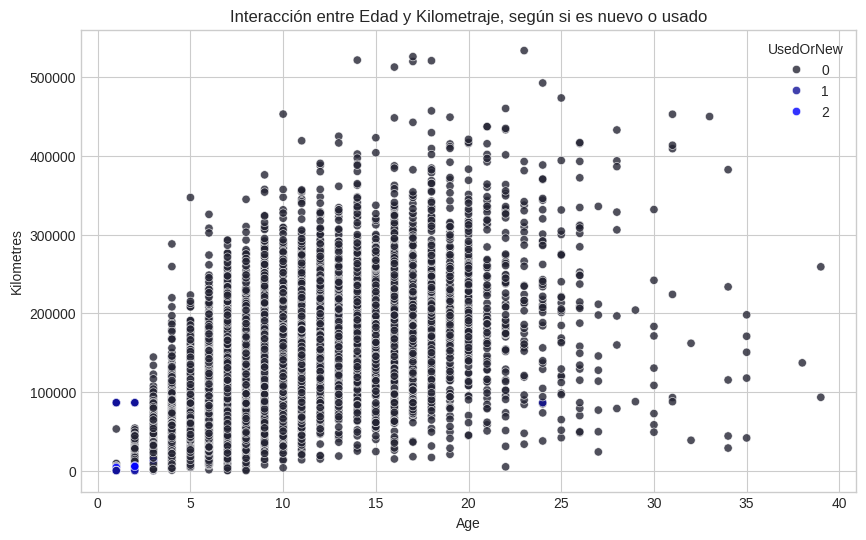

In [157]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Kilometres', hue= 'UsedOrNew', alpha=0.8, palette='dark:blue')
plt.title('Interacción entre Edad y Kilometraje, según si es nuevo o usado')
plt.xlabel('Age')
plt.ylabel('Kilometres')
plt.show()

Se aprecia una mayor concentración de los datos para el caso de los vehículos que presentan una edad menor de 30 años. Por ahora vamos a conservar todos los datos con el fin de poder comparar los resultados obtenidos con los del desafío anterior.
  

Ahora generamos una nueva variable a partir de la relación de Kilometraje/Años, la cual puede indicar el uso del vehículo y ayudar a predecir el precio.

In [158]:
df['Kilometres_Per_Year'] = df['Kilometres'] / (2023 - df['Year'] + 1)
df['Kilometres_Per_Year']

0         2797.500000
1            8.000000
2         4236.000000
3        10501.307692
4          517.500000
             ...     
16561     6600.000000
16562     9786.000000
16563     2582.500000
16564    10690.625000
16565    10617.333333
Name: Kilometres_Per_Year, Length: 16566, dtype: float64

Ahora nuestro dataframe presenta la siguiente información:

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16566 entries, 0 to 16565
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 16566 non-null  int64  
 1   UsedOrNew            16566 non-null  int64  
 2   Transmission         16566 non-null  int64  
 3   DriveType            16566 non-null  object 
 4   FuelType             16566 non-null  object 
 5   Kilometres           16566 non-null  int64  
 6   BodyType             16566 non-null  object 
 7   Doors                16566 non-null  int64  
 8   Seats                16566 non-null  int64  
 9   Price                16566 non-null  int64  
 10  Brand                16566 non-null  object 
 11  Engine               16566 non-null  object 
 12  FuelConsumtion       16566 non-null  object 
 13  State                16566 non-null  object 
 14  Age                  16566 non-null  int64  
 15  Kilometres_Per_Year  16566 non-null 

In [160]:
df.describe()

,Year,UsedOrNew,Transmission,Kilometres,Doors,Seats,Price,Age,Kilometres_Per_Year
count,16566.00000,16566.000000,16566.000000,16566.000000,16566.000000,16566.000000,16566.000000,16566.00000,16566.000000
mean,2016.22854,0.128577,0.117349,100070.834239,4.005010,5.094591,36850.967584,7.77146,14130.232050
std,5.12260,0.413194,0.321845,76911.762104,0.658666,1.073647,33276.761290,5.12260,14663.757317
min,1985.00000,0.000000,0.000000,1.000000,2.000000,2.000000,880.000000,1.00000,0.125000
25%,2013.00000,0.000000,0.000000,43482.750000,4.000000,5.000000,18991.000000,4.00000,7414.727564
50%,2017.00000,0.000000,0.000000,86331.000000,4.000000,5.000000,29065.000000,7.00000,11647.750000
75%,2020.00000,0.000000,0.000000,144199.000000,4.000000,5.000000,43987.750000,11.00000,16184.802083
max,2023.00000,2.000000,1.000000,533849.000000,5.000000,22.000000,499990.000000,39.00000,86331.000000


# **4. Encoding**

In [161]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Separamos las características y la variable objetivo:

In [162]:
X = df.drop('Price', axis=1)
y = df['Price']

Dividimos los datos en conjuntos de entrenamiento y prueba

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Realizamos el Preprocesamiento: codificación y escalado

In [164]:
numeric_features = ['Year', 'UsedOrNew', 'Transmission', 'Kilometres', 'Doors', 'Seats', 'Age', 'Kilometres_Per_Year']
categorical_features = ['DriveType', 'FuelType', 'BodyType', 'Brand', 'Engine', 'FuelConsumtion', 'State']

In [165]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

Creamos el primer pipeline con el transformador para cada tipo de variable:

In [166]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

Crear el pipeline con Random Forest

In [167]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestRegressor(random_state=42))])

# **5. Entrenamiento del modelo de RandomForestRegressor**

Vamos a realizar un entrenamiento al modelo de Random Forest con el objetivo de obtener las características de mayor importancia para el modelo:

In [168]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'UsedOrNew',
                                                   'Transmission', 'Kilometres',
                                                   'Doors', 'Seats', 'Age',
                                                   'Kilometres_Per_Year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['DriveType', 'FuelType',
                                                   'BodyType', 'Brand',
                                                   'Engine', 'FuelConsumtion',
                                                   'State'])])),
                ('classifier', RandomForestRegressor(random_state=42))])

In [169]:
results = {}

for model in [model]:
    name = model.__class__.__name__
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    rae = np.sum(np.abs(y_test - y_pred)) / np.sum(np.abs(y_test - np.mean(y_test)))
    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]
    p = X_test.shape[1]
    r2_adjusted = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'RAE': rae,
        'R2': r2,
        'R2_ajustado': r2_adjusted
    }

In [170]:
# Mostrar resultados
results_df = pd.DataFrame(results)
print(results_df)

                 Pipeline
MAE          7.026007e+03
MAPE         2.045096e+01
MSE          2.444766e+08
R2           7.591862e-01
R2_ajustado  7.580910e-01
RAE          3.637035e-01
RMSE         1.563575e+04


# **6. Feature Importance**

Definimos el siguiente comando para btener el grado de importancia de las características:

In [171]:
importances = model.named_steps['classifier'].feature_importances_

Obtenemos los nombres de las características después de OneHotEncoding

In [172]:
onehot_features = model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
feature_names = np.concatenate([numeric_features, onehot_features])

Creamos un DataFrame con las importancias

In [173]:
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

Seleccionamos las características más importantes, para entrenar de nuevo con el modelo de Random Forest:

In [174]:
top_features = feature_importances['feature'].head(10).tolist()
top_features

['Engine_Motor Grande',
 'Year',
 'Age',
 'Kilometres',
 'Engine_Motor Muy Grande',
 'Kilometres_Per_Year',
 'DriveType_Front',
 'FuelType_Unleaded',
 'State_Unknown',
 'Seats']

# **7. Evaluación del modelo con las características seleccionadas antes de la validación cruzada**

Filtramos el dataframe original para incluir solo las características más importantes. Y ajustamos los nombres de las características en el conjunto de entrenamiento y prueba

In [175]:
X_train_top = model.named_steps['preprocessor'].transform(X_train)
X_test_top = model.named_steps['preprocessor'].transform(X_test)

Filtramos solo las columnas correspondientes a las características más importantes

In [176]:
top_feature_indices = [i for i, feature in enumerate(feature_names) if feature in top_features]
X_train_top = X_train_top[:, top_feature_indices]
X_test_top = X_test_top[:, top_feature_indices]

Entrenamos el modelo de Random Forest con las características seleccionadas

In [177]:
rf_model_top = RandomForestRegressor(random_state=42)
rf_model_top.fit(X_train_top, y_train)

RandomForestRegressor(random_state=42)

Evaluamos el modelo en el conjunto de prueba

In [178]:
y_pred = rf_model_top.predict(X_test_top)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rae = np.sum(np.abs(y_test - y_pred)) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, y_pred)
r2_adjusted = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Initial Evaluation with Selected Features")
print(f"Test MSE: {mse}")
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test MAPE: {mape}")
print(f"Test RAE: {rae}")
print(f"Test R2: {r2}")
print(f"Test R2_ajustado: {r2_adjusted}")

Initial Evaluation with Selected Features
Test MSE: 431300664.121037
Test RMSE: 20767.779470156096
Test MAE: 10422.087562036653
Test MAPE: 29.057792352972566
Test RAE: 0.5395026053476326
Test R2: 0.5751612685092616
Test R2_ajustado: 0.5732290123017537


# **8. Validación Cruzada y Evaluación del modelo con las características seleccionadas**

In [179]:
from sklearn.model_selection import cross_val_score, KFold

Vamos a realizar el preprocesdamiento para las características seleccionadas:

In [180]:
selected_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, [f for f in numeric_features if f in top_features]),
        ('cat', categorical_transformer, [f for f in categorical_features if any(f in s for s in top_features)])
    ], remainder='drop')

Creamos el pipeline de preprocesamiento y Random Forest nuevamente

In [181]:
model_top = Pipeline(steps=[('preprocessor', selected_preprocessor),
                            ('classifier', RandomForestRegressor(random_state=42))])

**Definimos el KFold Cross-Validation**

In [182]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Evaluamos el modelo el modelo con Cross-Validation

In [183]:
cv_results = cross_val_score(model_top, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

Se convierten los resultados negativos de MSE a positivos

In [184]:
cv_mse_scores = -cv_results
cv_rmse_scores = np.sqrt(cv_mse_scores)

In [186]:
print(f"\nCross-Validation Evaluation with Selected Features")
print(f"MSE Scores: {cv_mse_scores}")
print(f"Mean MSE: {cv_mse_scores.mean()}")
print(f"RMSE Scores: {cv_rmse_scores}")
print(f"Mean RMSE: {cv_rmse_scores.mean()}")


Cross-Validation Evaluation with Selected Features
MSE Scores: [3.04203815e+08 3.62659417e+08 4.31038932e+08 4.09320794e+08
 4.08444648e+08]
Mean MSE: 383133521.44638413
RMSE Scores: [17441.43959216 19043.61880716 20761.47711876 20231.67798981
 20210.01356943]
Mean RMSE: 19537.64541546317


Entrenamos el modelo final en el conjunto de entrenamiento completo

In [187]:
model_top.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Kilometres',
                                                   'Seats', 'Age',
                                                   'Kilometres_Per_Year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['DriveType', 'FuelType',
                                                   'Engine', 'State'])])),
                ('classifier', RandomForestRegressor(random_state=42))])

Finalmente, evaluamos el modelo en el conjunto de prueba

In [189]:
y_pred = model_top.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rae = np.sum(np.abs(y_test - y_pred)) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, y_pred)
r2_adjusted = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"\nFinal Evaluation with Cross-Validation")
print(f"Test MSE: {mse}")
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test MAPE: {mape}")
print(f"Test RAE: {rae}")
print(f"Test R2: {r2}")
print(f"Test R2_ajustado: {r2_adjusted}")


Final Evaluation with Cross-Validation
Test MSE: 350194278.5757417
Test RMSE: 18713.47852687313
Test MAE: 9186.336502966884
Test MAPE: 26.417918387218513
Test RAE: 0.4755335672868016
Test R2: 0.6550524831937635
Test R2_ajustado: 0.6534835890906423


Al comparar estas métricas con las obtenidas antes de realizar el proceso de Cross-Validation, tenemos lo siguiente:

1. El Error Cuadrático Medio (MSE) y el Error Medio Absoluto (MAE) disminuyen luego de la validación cruzada, lo que indica que el modelo tiene un mejor ajuste a los datos, reduciendo el error promedio de las predicciones.

2. La Raíz del Error Cuadrático Medio (RMSE) también disminuye, lo cual refuerza que el modelo ha mejorado en términos de error estándar de las predicciones.

3. El Error Porcentual Absoluto Medio (MAPE) disminuye también, lo que se traduce en que el modelo está prediciendo con más precisión en términos relativos a los valores reales.

4. El Error Absoluto Relativo (RAE), igualmente disminuye. Esto indica una mejora en la capacidad del modelo para predecir en comparación con un modelo de referencia (por ejemplo, la media).

5. El Coeficiente de Determinación (R2) y R2 Ajustado aumentan, indicando que el modelo explica mejor la variabilidad de los datos después de la validación cruzada.




# **9. Conclusiones**

La mejora en las métricas después de aplicar la validación cruzada indica que el modelo se ha ajustado mejor a los datos, reduciendo el error de predicción y mejorando su capacidad explicativa. La validación cruzada, junto con la selección de características importantes, ha llevado a un modelo más robusto y generalizable, mejorando su rendimiento en datos no vistos.

Sin embargo, los mejores resultados en las métricas se obtuvieron en el modelo antes de aplicar la selección de características importantes y la validación cruzada. Esto puede explicarse porque al utilizar todas las características disponibles puede generar un modelo más complejo que se ajuste mejor a los datos de entrenamiento, pero no necesariamente generalice bien a nuevos datos (overfitting). También puede ser debido a la selección de características, que aunque es útil para reducir la dimensionalidad y eliminar el ruido, puede también omitir características que, aunque tengan menor importancia individual, en conjunto con otras pueden ser cruciales para el modelo.

No obstante, la teoría nos indica que la selección de características y la validación cruzada generalmente producen un modelo más robusto y generalizable. Aunque las métricas pueden parecer peores, el modelo resultante es más confiable para hacer predicciones en nuevos datos.